In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.9 MB/s eta 0:00:00


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
videopath = '/content/drive/MyDrive/eksperimen fisika/fedorGorst/fedorGorst.mp4'

In [15]:
from scipy.signal import savgol_filter
from ultralytics import YOLO
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp


In [5]:

model = YOLO('/content/yolo11x-pose.pt')

In [41]:
results = model.predict(source=videopath,
                        imgsz=(540,1170),
                        project='/content/drive/MyDrive/eksperimen fisika/fedorGorst',
                        name='fedorGorst-done',
                        half=True,
                        save=True,
                        show_boxes=False,
                        show_labels=False,
                        show_conf=False)


WARNING ⚠️ imgsz=[540, 1170] must be multiple of max stride 32, updating to [544, 1184]
WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/255) /content/drive/MyDrive/eksperimen fisika/fedorGorst/fedorGorst.mp4: 544x1184 2 persons, 58.9ms
video 1/1 (frame 2/255) /content/drive/MyDrive/eksperimen fisika/fedorGorst/fedorGorst.mp4: 544x1184 2 persons, 58.9ms
video 1/1 (frame 3/255) /content/drive/MyDrive/eksperimen fisika/fedorGorst/fedorGorst.mp4: 544x1184 2 persons, 46.2ms
video 1/1 (fr

In [17]:
for r in results:
  print(r.keypoints)

Streaming output truncated to the last 5000 lines.
orig_shape: (720, 1560)
shape: torch.Size([2, 17, 3])
xy: tensor([[[ 422.9779,  293.3272],
         [ 428.6029,  285.5515],
         [ 416.0294,  285.2206],
         [ 423.6397,  274.1360],
         [ 381.9485,  269.5037],
         [ 420.0000,  278.4375],
         [ 312.4632,  236.2500],
         [ 516.2867,  306.3970],
         [ 205.9191,  186.9485],
         [ 603.3088,  322.4449],
         [ 222.6287,  267.1875],
         [ 321.3970,  305.7353],
         [ 243.9706,  291.0110],
         [ 382.6103,  394.7426],
         [ 218.1617,  412.9412],
         [ 416.3603,  525.4412],
         [ 198.9706,  523.4559]],

        [[1493.3823,  651.5073],
         [1501.3235,  644.8897],
         [1486.7646,  645.5515],
         [1511.9117,  650.1838],
         [1478.8235,  651.8382],
         [1530.4412,  690.8823],
         [1464.2646,  691.5441],
         [1533.0883,  714.0441],
         [1458.9706,  714.7059],
         [1510.5883,  696.8382]

KeyboardInterrupt: 

In [42]:

# Define COCO keypoint names for better readability
keypoint_names = [
    'nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear',
    'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
    'left_wrist', 'right_wrist', 'left_hip', 'right_hip',
    'left_knee', 'right_knee', 'left_ankle', 'right_ankle'
]

all_keypoints_data = []

for frame_idx, r in enumerate(results):
    # Each `r.keypoints.xy` contains keypoint coordinates for all detected persons in the current frame
    # Shape: (num_persons, num_keypoints, 2) -> (x, y)
    # Each `r.keypoints.conf` contains confidence scores for all detected persons in the current frame
    # Shape: (num_persons, num_keypoints)

    if r.keypoints is not None and r.keypoints.xyn is not None:
        # Ensure keypoints and their coordinates are present
        keypoints_xy = r.keypoints.xyn.cpu().numpy()  # Move to CPU and convert to NumPy array
        keypoints_conf = r.keypoints.conf.cpu().numpy() # Move to CPU and convert to NumPy array

        for person_id, (person_kps_xy, person_kps_conf) in enumerate(zip(keypoints_xy, keypoints_conf)):
            for kp_idx, (xy_coords, conf) in enumerate(zip(person_kps_xy, person_kps_conf)):
                x, y = xy_coords
                keypoint_name = keypoint_names[kp_idx]
                all_keypoints_data.append({
                    'frame': frame_idx,
                    'person_id': person_id,
                    'keypoint_id': kp_idx,
                    'keypoint_name': keypoint_name,
                    'x': x,
                    'y': y,
                    'confidence': conf
                })

# Create the pandas DataFrame
landmarks_df = pd.DataFrame(all_keypoints_data)

print(f"Extracted keypoint data for {landmarks_df['frame'].nunique()} frames and {landmarks_df['person_id'].nunique()} persons.")

Extracted keypoint data for 255 frames and 2 persons.


In [43]:
# Display the first few rows of the DataFrame
display(landmarks_df.head())

,frame,person_id,keypoint_id,keypoint_name,x,y,confidence
0,0,0,0,nose,0.278139,0.199449,0.993164
1,0,0,1,left_eye,0.280260,0.186006,0.723145
2,0,0,2,right_eye,0.271988,0.186811,0.997070
3,0,0,3,left_ear,0.276442,0.178998,0.020798
4,0,0,4,right_ear,0.250141,0.177390,0.995117


In [44]:
# Display information about the DataFrame to check data types and non-null counts
display(landmarks_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8670 entries, 0 to 8669
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   frame          8670 non-null   int64  
 1   person_id      8670 non-null   int64  
 2   keypoint_id    8670 non-null   int64  
 3   keypoint_name  8670 non-null   object 
 4   x              8670 non-null   float32
 5   y              8670 non-null   float32
 6   confidence     8670 non-null   float32
dtypes: float32(3), int64(3), object(1)
memory usage: 372.7+ KB


None

In [51]:
# only consider relevant columns
positions = landmarks_df

positions = positions[(positions['keypoint_name'] == 'right_wrist')]
positions = positions[['frame', 'x', 'y']]
positions.head()

,frame,x,y
10,0,0.191070,0.334329
27,0,0.947964,0.965074
44,1,0.190646,0.333640
61,1,0.947964,0.965074
78,2,0.191389,0.332261


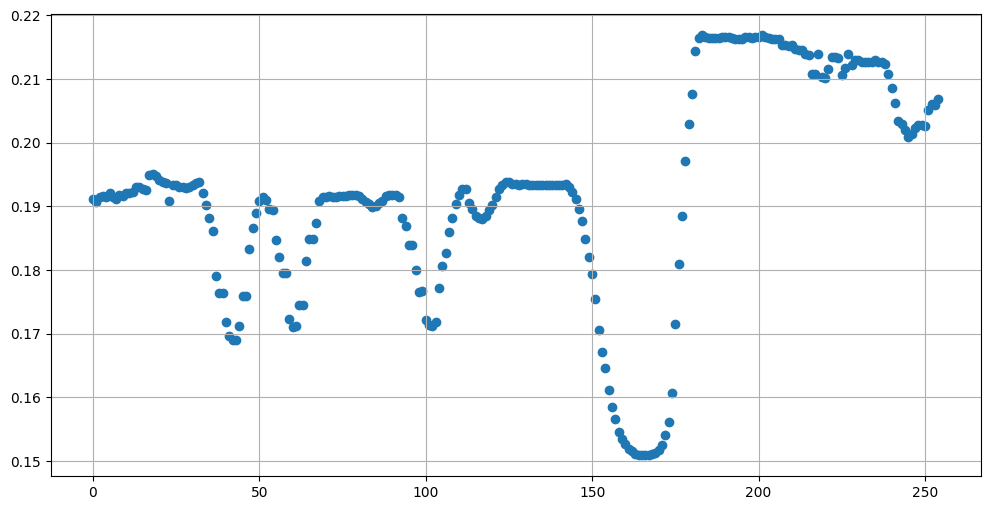

In [52]:
# data cleaning




# condition_frame = (175 < positions['frame']) & (positions['frame'] < 185)
# condition_x = (positions['x'] < 0.29)
# positions = positions[~(condition_x & condition_frame)]

# condition_frame = (50 < positions['frame']) & (positions['frame'] < 75)
# condition_x = (positions['x'] < 0.12)
# positions = positions[~(condition_x & condition_frame)]



# condition_frame = (positions['frame'] < 25)
# condition_x = (positions['x'] > 0.1)
# positions = positions[~(condition_x & condition_frame)]

# condition_frame = (190 < positions['frame'])
# condition_x = (positions['x'] < 0.12)
# positions = positions[~(condition_x & condition_frame)]

# positions = positions[(0.1 < positions['x']) & (positions['x'] < 0.23)]

positions = positions[positions['x'] < 0.3]

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.scatter(positions['frame'], positions['x'])
plt.show()


/tmp/ipython-input-3147387272.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[    0.19039     0.19061     0.19289     0.18911     0.19156     0.18525     0.17681     0.16734     0.15918      0.1619     0.15227     0.16225     0.15657      0.1679     0.16418     0.16727     0.17312     0.17791     0.18153     0.18446     0.18769     0.18948     0.18911     0.18681     0.18676     0.18946
     0.18937     0.18612     0.19273     0.18905     0.18811     0.18843     0.19001     0.19088     0.18993     0.19024     0.19119     0.19302     0.19316     0.19123     0.19116     0.18891     0.18446     0.17905     0.17612     0.17296     0.16072     0.14875     0.15509     0.14303      0.1429     0.14044
     0.14538      0.1588     0.15822     0.16934     0.17211     0.17685     0.18333     0.18945]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  positions.loc[mask

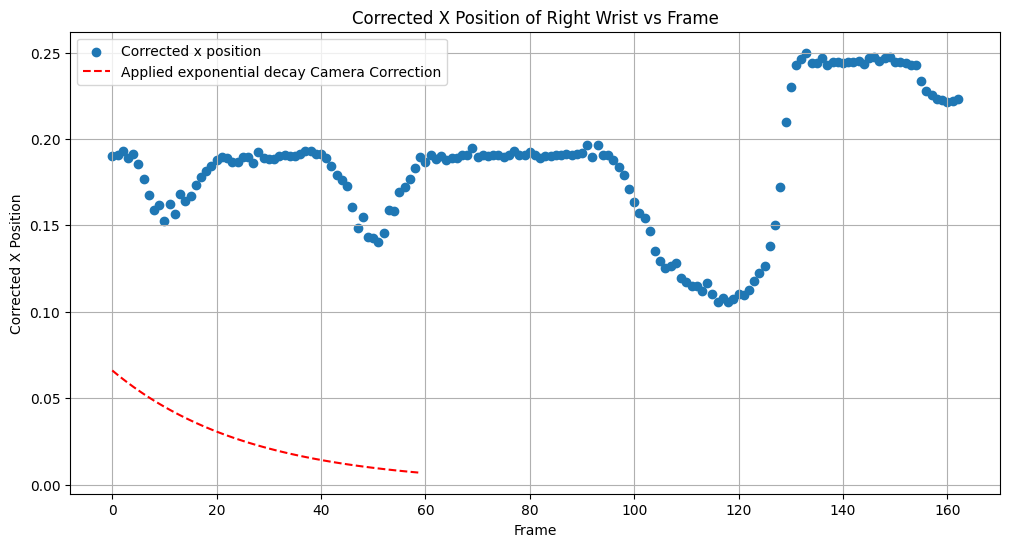

First few rows of corrected positions:
     frame         x         y
10       0  0.190394  0.559028
44       1  0.190610  0.599826
78       2  0.192885  0.593316
95       3  0.189109  0.606337
112      4  0.191561  0.594618


In [ ]:
# account for camera movement
positions = positions.drop_duplicates(subset=['frame'], keep='first')
frame_limit = 60

y_init = 0.190 - 0.110
b = -1 * np.log(0.1) / frame_limit
mask = positions['frame'] < frame_limit

# Calculate the camera movement correction (linear adjustment) for the relevant frames
# exponential decay
# y = A e^(-b(x - x0))
camera_movement_correction = y_init * np.exp(-1 * b * (positions.loc[mask, 'frame'] + 5))

# Apply the correction to the 'x' position for the masked frames
positions.loc[mask, 'x'] += camera_movement_correction

plt.figure(figsize=(12, 6))
plt.scatter(positions['frame'], positions['x'], label='Corrected x position')
plt.plot(positions.loc[mask, 'frame'], camera_movement_correction, 'r--', label='Applied exponential decay Camera Correction')
plt.title('Corrected X Position of Right Wrist vs Frame')
plt.xlabel('Frame')
plt.ylabel('Corrected X Position')
plt.grid(True)
plt.legend()
plt.show()

print("First few rows of corrected positions:")
print(positions.head())

255
255


/tmp/ipython-input-2027559334.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  position.iloc[:] = positions['x'].iloc[:].rolling(window=3).mean().fillna(method='bfill').fillna(method='ffill')
/tmp/ipython-input-2027559334.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position.iloc[:] = positions['x'].iloc[:].rolling(window=3).mean().fillna(method='bfill').fillna(method='ffill')
/tmp/ipython-input-2027559334.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[    0.19104     0.19104     0.19104     0.19121     0.19146     0.19167      0.1916     0.19153     0.19142     0.19149     0.19178     0.19188      0.1921     0.19245 

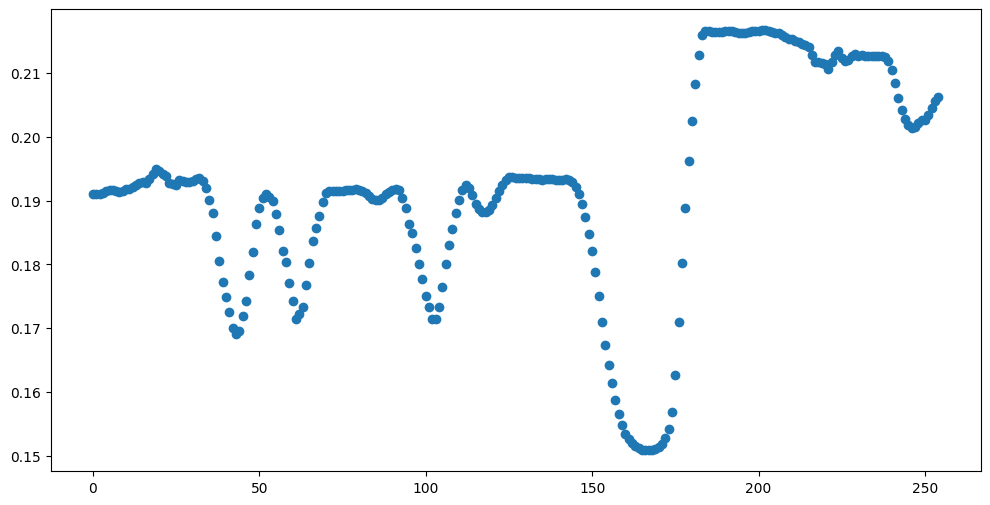

In [50]:
positions = positions.drop_duplicates(subset=['frame'], keep='first')

frames = positions['frame']
position = positions['x']
# moving average on subset of position dataframe, then replace the old values of the subset
position.iloc[:] = positions['x'].iloc[:].rolling(window=3).mean().fillna(method='bfill').fillna(method='ffill')
# position.iloc[:120] = positions['x'].iloc[:120].rolling(window=5).mean().fillna(method='bfill').fillna(method='ffill')
# position.iloc[170:200] = positions['x'].iloc[170:200].rolling(window=5).mean().fillna(method='bfill').fillna(method='ffill')

plt.figure(figsize=(12, 6))
plt.scatter(frames, position)
print(len(frames))
print(len(position))

163
163


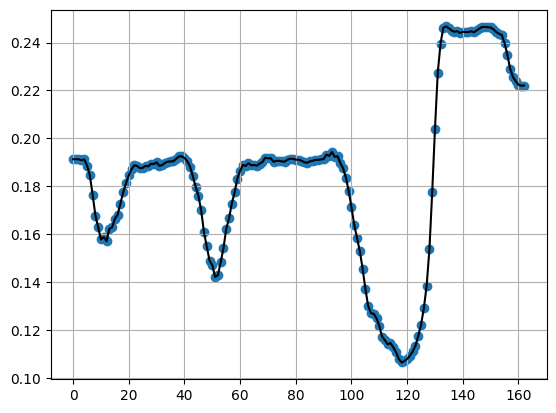

In [ ]:
# interpolating data, and plotting

print(len(frames))
print(len(position))

f = sp.interpolate.CubicSpline(frames, position)
splines = f(frames)

plt.scatter(frames, position)

plt.plot(frames, splines, 'black')

<Figure size 1200x600 with 0 Axes>

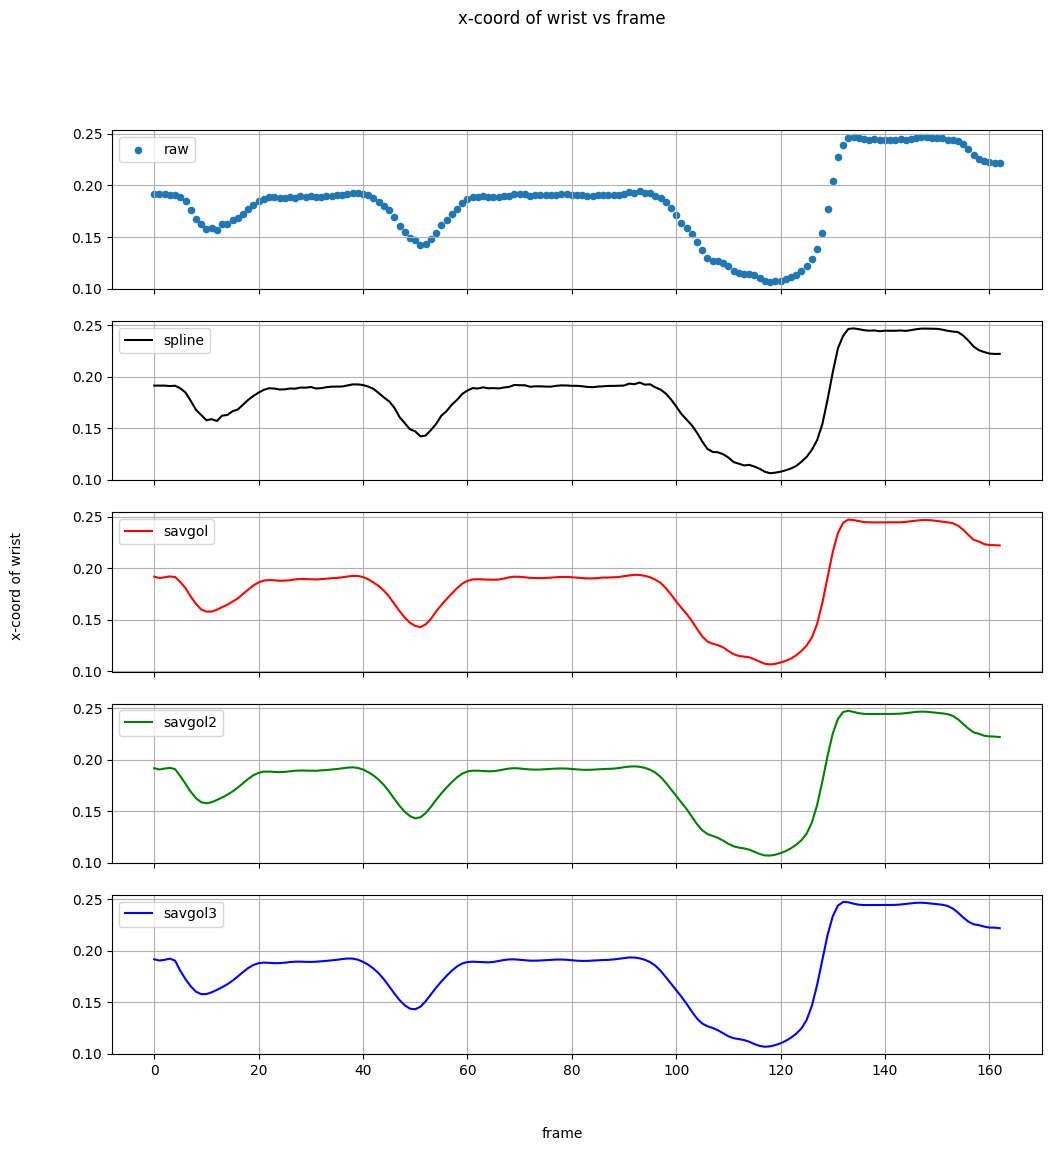

In [ ]:
# smoothing data, and plotting

smooth1 = savgol_filter(splines, 10, 4)
smooth2 = savgol_filter(smooth1, 10, 4)
smooth3 = savgol_filter(smooth2, 10, 7)

plt.figure(figsize=(12, 6))
plt.rcParams['axes.grid'] = True
fig, axes = plt.subplots(5, 1, figsize=(12, 12), sharex=True)
fig.suptitle('x-coord of wrist vs frame')



axes[0].scatter(positions['frame'], positions['x'], s=20, label='raw')
axes[1].plot(frames, splines, 'black', label='spline')
axes[2].plot(frames, smooth1, 'red', label='savgol')
axes[3].plot(frames, smooth2, 'green', label='savgol2')
axes[4].plot(frames, smooth3, 'blue', label='savgol3')


axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
axes[2].legend(loc='upper left')
axes[3].legend(loc='upper left')
axes[4].legend(loc='upper left')

fig.text(0.04, 0.5, 'x-coord of wrist', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'frame', ha='center')

# plt.savefig('/content/drive/MyDrive/eksperimen fisika/plot.png', dpi=300)
plt.show()


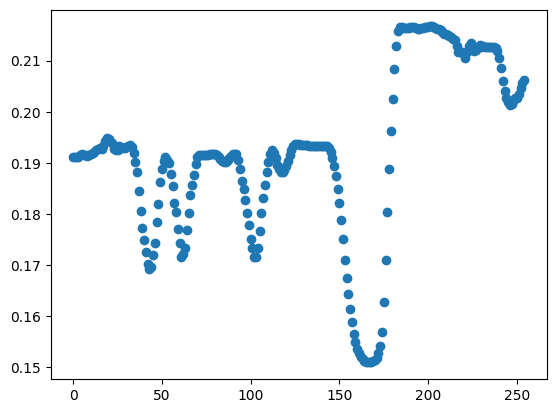

In [55]:
# save 'positions' dataframe as csv with name drawshot-1
out_path = '/content/drive/MyDrive/eksperimen fisika/fedorGorst/fedorGorst.csv'
df_save = {
    'frame': frames,
    'x': position
}
positions = pd.DataFrame(df_save)
plt.scatter(positions['frame'], positions['x'])
# plt.plot(frames, smooth3, 'r')
positions.to_csv(out_path, index=False)